In [35]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
folder='folder/'
files=os.listdir(folder)
len(files)

5172

In [3]:
files=os.listdir(folder)
files[:5]

['0001.1999-12-10.farmer.ham.txt',
 '0002.1999-12-13.farmer.ham.txt',
 '0003.1999-12-14.farmer.ham.txt',
 '0004.1999-12-14.farmer.ham.txt',
 '0005.1999-12-14.farmer.ham.txt']

In [4]:
emails=[folder + file for file in files]
emails[:5]

['folder/0001.1999-12-10.farmer.ham.txt',
 'folder/0002.1999-12-13.farmer.ham.txt',
 'folder/0003.1999-12-14.farmer.ham.txt',
 'folder/0004.1999-12-14.farmer.ham.txt',
 'folder/0005.1999-12-14.farmer.ham.txt']

In [5]:
words=[]

for email in emails:
    f=open(email,encoding='latin-1')
    blob=f.read()
    words=words+blob.split()
len(words)

1178890

In [6]:
for i in range(len(words)):
    if not words[i].isalpha():
        words[i]=""

In [7]:
word_dict=Counter(words)
word_dict

Counter({'': 414576,
         'christmas': 29,
         'tree': 13,
         'farm': 17,
         'pictures': 58,
         'vastar': 11,
         'resources': 273,
         'inc': 517,
         'gary': 564,
         'production': 703,
         'from': 4192,
         'the': 25656,
         'high': 362,
         'island': 39,
         'larger': 29,
         'block': 26,
         'a': 9820,
         'commenced': 12,
         'on': 7312,
         'saturday': 94,
         'at': 3735,
         'p': 841,
         'm': 1031,
         'about': 848,
         'gross': 16,
         'carlos': 191,
         'expects': 62,
         'between': 240,
         'and': 12829,
         'for': 10508,
         'tomorrow': 153,
         'owns': 27,
         'of': 10188,
         'george': 415,
         'x': 695,
         'forwarded': 1297,
         'by': 3000,
         'weissman': 196,
         'hou': 7289,
         'ect': 13900,
         'am': 2532,
         'daren': 1901,
         'j': 1336,
         'farmer

In [8]:
word_dict=Counter(words)
len(word_dict)


45725

In [9]:
del word_dict[""]

In [10]:
word_dict=word_dict.most_common(3000)
word_dict[:5]

[('the', 25656), ('to', 20345), ('ect', 13900), ('and', 12829), ('for', 10508)]

In [11]:
features=[]
labels=[]

for email in emails:
    f=open(email,encoding='latin-1')
    blob=f.read().split(" ")
    data=[]
    
    for i in word_dict:
        data.append(blob.count(i[0]))
    features.append(data)
    
    if 'spam'in email:
        labels.append(1)
    if 'ham' in email:
        labels.append(0)

print("Features", len(features))
print("Labels", len(labels))

Features 5172
Labels 5172


In [12]:
# Independent variables

features=np.array(features)
print(features.shape)
features[:5]

(5172, 3000)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 5,  4, 12, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  2, 13, ...,  0,  0,  0],
       [ 2,  3, 10, ...,  0,  0,  0]])

In [13]:
# Dependent variables

labels=np.array(labels)
print(labels.shape)
labels

(5172,)


array([0, 0, 0, ..., 1, 1, 0])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=9)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((4137, 3000), (1035, 3000), (4137,), (1035,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
lst = [3,4,5,6,7,8]
accuracies = []
for i in lst:   
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    
    accuracies.append(round(knn.score(X_test, y_test),4))
    
accuracies

[0.8879, 0.886, 0.8715, 0.8802, 0.8657, 0.8647]

In [36]:
acc = pd.DataFrame({"n_neighbors": lst,
                   "Accuracies" : accuracies})
acc

,n_neighbors,Accuracies
0,3,0.8879
1,4,0.8860
2,5,0.8715
3,6,0.8802
4,7,0.8657
5,8,0.8647


In [43]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [44]:
predict= knn.predict(X_test)
m=confusion_matrix(predict,y_test)
print(m)

[[637  39]
 [ 85 274]]


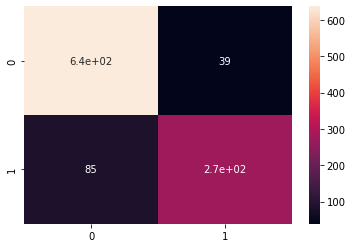

In [45]:
import seaborn as sns
sns.heatmap(m, annot=True);

In [46]:
from sklearn.metrics import precision_score, recall_score
print("precision_score",precision_score(predict,y_test))
print("recall_score",recall_score(predict,y_test))

precision_score 0.8753993610223643
recall_score 0.7632311977715878
